In [2]:
import tensorflow as tf
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [3]:
print("Shape of un-processed training dataset = " + str(x_train.shape))
print("Shape of un-processed test dataset = " + str(x_test.shape))

Shape of un-processed training dataset = (60000, 28, 28)
Shape of un-processed test dataset = (10000, 28, 28)


In [4]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28,28,1)

In [5]:
print("Shape of processed training dataset = " + str(x_train.shape))
print("Shape of processed test dataset = " + str(x_test.shape))

Shape of processed training dataset = (60000, 28, 28, 1)
Shape of processed test dataset = (10000, 28, 28, 1)


In [6]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

Train: X=(60000, 28, 28, 1), y=(60000,)
Test: X=(10000, 28, 28, 1), y=(10000,)


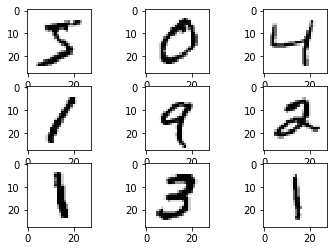

In [7]:
from matplotlib import pyplot

print('Train: X=%s, y=%s' % (x_train.shape, y_train.shape))
print('Test: X=%s, y=%s' % (x_test.shape, y_test.shape))

for i in range(9):
    # define subplot
    pyplot.subplot(330 + 1 + i)
    # plot raw pixel data
    pyplot.imshow(x_train[i].reshape(28, 28), cmap='Greys')
# show the figure
pyplot.show()

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten

In [7]:
model = Sequential()
model.add(Conv2D(28, kernel_size = (3,3), input_shape = input_shape))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Conv2D(24, kernel_size = (3,3), input_shape = (13,13)))
model.add(Flatten())
model.add(Dense(128, activation = tf.nn.relu))
model.add(Dense(64, activation = tf.nn.relu))
model.add(Dense(32, activation = tf.nn.relu))
model.add(Dense(16, activation = tf.nn.relu))
model.add(Dense(10, activation = tf.nn.softmax))

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 28)        280       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 28)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 24)        6072      
_________________________________________________________________
flatten (Flatten)            (None, 2904)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               371840    
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_2 (Dense)              (None, 32)                2

In [9]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
history = model.fit(x = x_train, y = y_train, epochs = 30)

Epoch 1/30
1875/1875 [==============================] - 23s 12ms/step - loss: 0.3885 - accuracy: 0.8927
Epoch 2/30
1875/1875 [==============================] - 23s 12ms/step - loss: 0.1291 - accuracy: 0.9664
Epoch 3/30
1875/1875 [==============================] - 23s 12ms/step - loss: 0.0970 - accuracy: 0.9750
Epoch 4/30
1875/1875 [==============================] - 23s 12ms/step - loss: 0.0838 - accuracy: 0.97750s - loss: 0.0839 - ac
Epoch 5/30
1875/1875 [==============================] - 24s 13ms/step - loss: 0.0679 - accuracy: 0.9825
Epoch 6/30
1875/1875 [==============================] - 24s 13ms/step - loss: 0.0608 - accuracy: 0.9845
Epoch 7/30
1875/1875 [==============================] - 24s 13ms/step - loss: 0.0535 - accuracy: 0.9865
Epoch 8/30
1875/1875 [==============================] - 26s 14ms/step - loss: 0.0478 - accuracy: 0.98791s
Epoch 9/30
1875/1875 [==============================] - 24s 13ms/step - loss: 0.0421 - accuracy: 0.9895
Epoch 10/30
1875/1875 [=================

In [10]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.1161 - accuracy: 0.9858


[0.11606305837631226, 0.98580002784729]

In [16]:
model.save("MODEL")

INFO:tensorflow:Assets written to: MODEL\assets


In [8]:
from keras.models import load_model


model1 = load_model('MODEL')

(28, 28, 1)


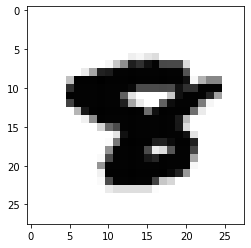





Prediction = 8


In [10]:
import tensorflow as tf
import matplotlib.pyplot as plt


(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

image_index = 998
print(x_test[image_index].shape)
plt.imshow(x_test[image_index].reshape(28, 28), cmap='Greys')
plt.show()
pred = model1.predict(x_test[image_index].reshape(1,28,28,1))
print("\n\n\n\nPrediction = " + str(pred.argmax()))